In [1]:
import pandas as pd

df = pd.read_csv('./all_listings.csv', parse_dates=['date_listed'])

In [2]:
df

,date_listed,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,hebrew_city,city_population,english_city
0,2023-03-22 16:39:02,רסקו ג',שאול המלך,"{'latitude': 32.1426365625, 'longitude': 34.87...",1,5,190,5180000,True,הוד השרון,65988,Hod HaSharon
1,2023-06-22 13:54:49,קרית נורדאו,נורדאו,"{'latitude': 32.285752, 'longitude': 34.857742}",3,4,92,2030000,True,נתניה,235790,Netanya
2,2023-05-02 13:13:06,מגדיאל,אהבה,"{'latitude': 32.161501, 'longitude': 34.901152}",5,5,210,4290000,True,הוד השרון,65988,Hod HaSharon
3,2023-05-07 16:45:27,מרכז העיר דרום,יהודה הלוי,"{'latitude': 32.322469, 'longitude': 34.85684}",5,4,118,2290000,True,נתניה,235790,Netanya
4,2023-06-22 12:41:20,נווה רסקו,הסייפן,"{'latitude': 32.134684, 'longitude': 34.83627}",0,5,269,11000000,True,רמת השרון,48211,Ramat HaSharon
...,...,...,...,...,...,...,...,...,...,...,...,...
38599,2023-05-16 17:24:31,אכזיב,אלמוג,"{'latitude': 33.037745, 'longitude': 35.10268}",8,5,240,7000,False,נהריה,65019,Nahariyya
38600,2023-04-30 21:27:43,אביבים,קדיש לוז,"{'latitude': 32.849503, 'longitude': 35.092256}",1,3,72,3100,False,קרית מוצקין,48578,Qiryat Motzkin
38601,2023-05-22 10:16:32,ורדיה,תאשור,"{'latitude': 32.7929452777778, 'longitude': 34...",0,5,130,6800,False,חיפה,293198,Haifa
38602,2023-06-21 12:44:13,קרית ים ב',שפרינצק,"{'latitude': 32.8470163888889, 'longitude': 35...",0,3,65,3500,False,קרית ים,42138,Qiryat Yam


In [4]:
import json
import pathlib


geodata = json.loads(pathlib.Path('./export.geojson').read_text(encoding='utf-8'))

In [5]:
geodata

{'type': 'FeatureCollection',
 'generator': 'overpass-ide',
 'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.',
 'timestamp': '2023-07-02T21:06:42Z',
 'features': [{'type': 'Feature',
   'properties': {'@id': 'way/10279158',
    'name': 'אי נחליאלי',
    'name:en': 'Nahlieli Island',
    'name:he': 'אי נחליאלי',
    'natural': 'coastline',
    'place': 'island',
    'source': 'bing',
    '@timestamp': '2017-06-18T11:30:32Z',
    '@version': '7',
    '@changeset': '49633098',
    '@user': 'Sanniu',
    '@uid': '1206509'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[35.0939678, 33.0713901],
      [35.0939367, 33.0710334],
      [35.0943119, 33.0711296],
      [35.0946501, 33.0713858],
      [35.0946739, 33.0716616],
      [35.0947945, 33.0717439],
      [35.0949602, 33.0717025],
      [35.0951021, 33.0720801],
      [35.094555, 33.0722934],
      [35.0944831, 33.0721781],
      [35.0941108, 33.0721484],
  

In [85]:
all_coordinates = set()
for feature in geodata['features']:
    if feature['geometry']['type'] == 'Polygon':
        coordinates_sequence = feature['geometry']['coordinates'][0]
    elif feature['geometry']['type'] == 'LineString':
        coordinates_sequence = feature['geometry']['coordinates']
    elif feature['geometry']['type'] == 'Point':
        coordinates_sequence = (feature['geometry']['coordinates'],)
    for coordinates in coordinates_sequence:
        all_coordinates.add((coordinates[1], coordinates[0]))
all_coordinates = sorted(all_coordinates, key=lambda x: x[1])

In [96]:
pathlib.Path('./coastline_coordinates.json').write_text(json.dumps(all_coordinates))

128074

In [62]:
longitude = [coordinates[0] for coordinates in all_coordinates]
latitude = [coordinates[1] for coordinates in all_coordinates]
apt = {'latitude': 32.1426365625, 'longitude': 34.8771251875}
apt = (32.1426365625, 34.8771251875)
longitude[0], latitude[0]

(34.4538546, 31.5468502)

In [63]:
import bisect

def find_closest_index(sorted_list, target):
    # Find the insertion point of the target number in the sorted list
    insertion_point = bisect.bisect_left(sorted_list, target)

    # Determine the index of the closest number in the list
    if insertion_point == 0:
        closest_index = 0
    elif insertion_point == len(sorted_list):
        closest_index = len(sorted_list) - 1
    else:
        left_value = sorted_list[insertion_point - 1]
        right_value = sorted_list[insertion_point]
        closest_index = insertion_point - 1 if target - left_value < right_value - target else insertion_point

    return closest_index

In [80]:
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(point1, point2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, (point1[0], point1[1], point2[0], point2[1]))

    # Radius of the Earth in kilometers
    earth_radius_km = 6371.0

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance_meters = int(earth_radius_km * c * 1000)

    return distance_meters

In [81]:
def distance_from_beach(apartment_coordinates):
    closest_index = find_closest_index(latitude, apartment_coordinates[0])
    closest_point = (latitude[closest_index], longitude[closest_index])
    return haversine_distance(apartment_coordinates, closest_point)

In [82]:
apt = (32.1426365625, 34.8771251875)
distance_from_beach(apt)

8138

In [5]:
import pandas as pd
df = pd.read_csv('./all_listings.csv', parse_dates=['date_listed'])


In [6]:
# add information about title 2 : property type - cottage, apartment, etc...

In [15]:
df[df.english_city=='Ashdod']


,date_listed,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,distance_from_beach,hebrew_city,city_population,english_city
8131,2023-06-06 17:29:22,"רובע י""ג",חזקיה המלך,"(31.7763110298508, 34.6476179253731)",0,4,125,2490000,True,3292,אשדוד,227262,Ashdod
8145,2023-06-06 17:29:22,"רובע י""ג",חזקיה המלך,"(31.7763110298508, 34.6476179253731)",0,4,125,2490000,True,3292,אשדוד,227262,Ashdod
8152,2023-05-15 07:48:44,"רובע ט""ו",איינשטיין,"(31.769898, 34.62807)",0,10,557,7450000,True,1333,אשדוד,227262,Ashdod
8154,2023-06-19 10:17:53,"רובע י""ג",ברק בן אבינועם,"(31.774088, 34.641755)",2,3,110,1850000,True,2693,אשדוד,227262,Ashdod
8155,2023-07-02 14:42:14,"רובע י""א",הר נבו,"(31.781326, 34.626987)",0,11,400,6500000,True,703,אשדוד,227262,Ashdod
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28848,2023-05-30 09:35:51,"רובע הקריה, הסיטי","תש""ח","(31.787623, 34.645517)",11,3,90,4500,False,1973,אשדוד,227262,Ashdod
28852,2023-05-28 19:48:25,רובע ג',חנה סנש,"(31.799474, 34.663455)",1,2,54,3200,False,3067,אשדוד,227262,Ashdod
28879,2023-05-27 16:38:55,"רובע י""ג",אליקים המלך,"(31.773935, 34.646309)",3,3,74,4800,False,3109,אשדוד,227262,Ashdod
28881,2023-04-27 10:40:34,רובע א',מקס נורדאו,"(31.809527, 34.643849)",3,3,90,3800,False,1046,אשדוד,227262,Ashdod


In [88]:
import pandas as pd
df = pd.read_csv('./all_listings.csv', parse_dates=['date_listed'])

In [89]:
df

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,distance_from_beach,property_type,link,city_population,english_city
0,2023-05-23 09:59:59,קדימה צורן,NaN,NaN,"(32.277681, 34.919213)",0,7,260,6150000,True,8003,דו משפחתי,https://www.yad2.co.il/item/hb6ibwbh,23325.0,Qadima- Zoran
1,2023-06-14 17:17:00,קדימה צורן,שאר העיר,סמטת ההדר,"(32.286483, 34.914671)",0,6,750,10650000,True,7346,בית פרטי/קוטג',https://www.yad2.co.il/item/vaf8wduk,23325.0,Qadima- Zoran
2,2023-06-29 05:17:52,נתניה,אגמים,אגם כנרת,"(32.290705, 34.851125)",0,5,228,4000000,True,1291,דירת גן,https://www.yad2.co.il/item/xu2wno1k,235790.0,Netanya
3,2023-05-03 12:29:37,רעננה,קרית שרת,גאולה,"(32.194826, 34.8563)",4,4,92,2900000,True,4735,דירה,https://www.yad2.co.il/item/m571t7en,81383.0,Ra'annana
4,2023-06-28 07:32:26,נתניה,קרית השרון,הגולן,"(32.308483, 34.8727)",3,5,133,3250000,True,3150,דירה,https://www.yad2.co.il/item/rcnfsvtu,235790.0,Netanya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54614,2023-05-24 11:36:47,טבריה,אחוזת כנרת,ברנר,"(32.793304, 35.528222)",1,3,200,1800,False,53669,דירה,https://www.yad2.co.il/item/1owrsrjm,49234.0,Tiberias
54615,2023-05-17 05:26:52,נהריה,עין שרה,השקד,"(32.988552, 35.085631)",3,3,80,3800,False,642,דירה,https://www.yad2.co.il/item/1de15yby,65020.0,Nahariyya
54616,2023-05-21 13:26:28,טירת כרמל,"שז""ר / דקר",דקר,"(32.766019, 34.968235)",3,4,97,3000,False,1507,דירה,https://www.yad2.co.il/item/oc96dnd5,29465.0,Tirat Karmel
54617,2023-04-17 12:53:23,עכו,קרית וולפסון,הרצל,"(32.928198, 35.080918)",1,2,60,2300,False,1048,דירה,https://www.yad2.co.il/item/31g80ib5,51964.0,Akko


Text(0.5, 1.0, 'Distribution of Property Types')

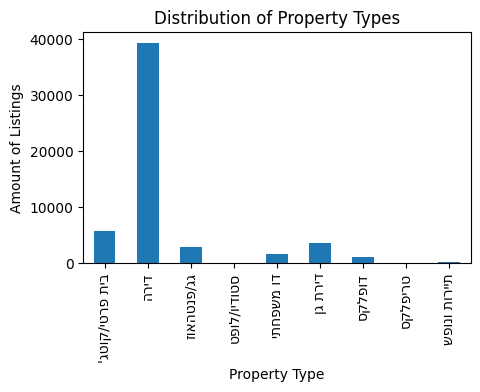

In [90]:
temp_df = df.copy()
temp_df.property_type = temp_df.property_type.apply(lambda x: x[::-1])
plot = temp_df.property_type.value_counts().sort_index().plot.bar(figsize=(5, 3))
plot.set_xlabel('Property Type')
plot.set_ylabel('Amount of Listings')
plot.set_title('Distribution of Property Types')

In [101]:
df[df.property_type.isin(('בית פרטי/קוטג\'', 'דופלקס', 'דו משפחתי')) & (df.distance_from_beach < 700) & (df.area < 240) & (df.date_listed > (pd.Timestamp.today() - pd.Timedelta(4, unit='W')).to_pydatetime())][['city', 'area', 'price', 'distance_from_beach', 'link']]

,city,area,price,distance_from_beach,link
586,הרצליה,170,9500000,596,https://www.yad2.co.il/item/27e0ts05
1628,נתניה,220,7500000,448,https://www.yad2.co.il/item/befepuyw
1899,נתניה,235,4500000,653,https://www.yad2.co.il/item/2aycq1q3
3076,נתניה,156,3550000,606,https://www.yad2.co.il/item/lfc3r6ps
4260,תל אביב יפו,160,5350000,319,https://www.yad2.co.il/item/2585cc9v
7853,תל אביב יפו,114,5100000,613,https://www.yad2.co.il/item/h2dkgwto
8211,תל אביב יפו,200,14500000,420,https://www.yad2.co.il/item/o4ete7gi
8994,תל אביב יפו,120,10500000,553,https://www.yad2.co.il/item/svfisd2n
11610,תל אביב יפו,100,11000000,435,https://www.yad2.co.il/item/78cz80wp
16647,אשקלון,98,1750000,495,https://www.yad2.co.il/item/kenf6g0t


In [94]:
df = df.drop_duplicates(subset='link', keep='first')

,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,distance_from_beach,property_type,link,city_population,english_city
0,2023-05-23 09:59:59,קדימה צורן,NaN,NaN,"(32.277681, 34.919213)",0,7,260,6150000,True,8003,דו משפחתי,https://www.yad2.co.il/item/hb6ibwbh,23325.0,Qadima- Zoran
1,2023-06-14 17:17:00,קדימה צורן,שאר העיר,סמטת ההדר,"(32.286483, 34.914671)",0,6,750,10650000,True,7346,בית פרטי/קוטג',https://www.yad2.co.il/item/vaf8wduk,23325.0,Qadima- Zoran
2,2023-06-29 05:17:52,נתניה,אגמים,אגם כנרת,"(32.290705, 34.851125)",0,5,228,4000000,True,1291,דירת גן,https://www.yad2.co.il/item/xu2wno1k,235790.0,Netanya
3,2023-05-03 12:29:37,רעננה,קרית שרת,גאולה,"(32.194826, 34.8563)",4,4,92,2900000,True,4735,דירה,https://www.yad2.co.il/item/m571t7en,81383.0,Ra'annana
4,2023-06-28 07:32:26,נתניה,קרית השרון,הגולן,"(32.308483, 34.8727)",3,5,133,3250000,True,3150,דירה,https://www.yad2.co.il/item/rcnfsvtu,235790.0,Netanya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54614,2023-05-24 11:36:47,טבריה,אחוזת כנרת,ברנר,"(32.793304, 35.528222)",1,3,200,1800,False,53669,דירה,https://www.yad2.co.il/item/1owrsrjm,49234.0,Tiberias
54615,2023-05-17 05:26:52,נהריה,עין שרה,השקד,"(32.988552, 35.085631)",3,3,80,3800,False,642,דירה,https://www.yad2.co.il/item/1de15yby,65020.0,Nahariyya
54616,2023-05-21 13:26:28,טירת כרמל,"שז""ר / דקר",דקר,"(32.766019, 34.968235)",3,4,97,3000,False,1507,דירה,https://www.yad2.co.il/item/oc96dnd5,29465.0,Tirat Karmel
54617,2023-04-17 12:53:23,עכו,קרית וולפסון,הרצל,"(32.928198, 35.080918)",1,2,60,2300,False,1048,דירה,https://www.yad2.co.il/item/31g80ib5,51964.0,Akko


In [87]:
# df['city_population'] = pd.to_numeric(df['city_population'], errors='coerce', downcast='integer')

print(df.city_population.dtypes)
df.city_population = df.city_population.round().astype('Int64')
df

float64


,date_listed,city,neighborhood,street,coordinates,floor,rooms,area,price,for_sale,distance_from_beach,property_type,city_population,english_city
0,2023-03-20 14:09:23,תל מונד,NaN,NaN,"(32.25286, 34.917422)",0,7,385,5600000,True,8529,דו משפחתי,14695,Tel Mond
1,2023-06-18 20:34:48,רמת השרון,NaN,NaN,"(32.139791, 34.842296)",0,6,350,12400000,True,4957,בית פרטי/קוטג',48211,Ramat HaSharon
2,2023-06-27 17:38:41,רעננה,מרכז דרום,NaN,"(32.177596, 34.871277)",2,4,110,3250000,True,6572,דירה,81383,Ra'annana
3,2023-06-29 05:17:52,נתניה,אגמים,אגם כנרת,"(32.290705, 34.851125)",0,5,228,4000000,True,1291,דירת גן,235790,Netanya
4,2023-06-14 17:17:00,קדימה צורן,שאר העיר,סמטת ההדר,"(32.286483, 34.914671)",0,6,750,1650000,True,7346,בית פרטי/קוטג',23325,Qadima- Zoran
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54395,2023-05-24 11:36:47,טבריה,אחוזת כנרת,ברנר,"(32.793304, 35.528222)",1,3,200,1800,False,53669,דירה,49234,Tiberias
54396,2023-05-17 05:26:52,נהריה,עין שרה,השקד,"(32.988552, 35.085631)",3,3,80,3800,False,642,דירה,65020,Nahariyya
54397,2023-05-21 13:26:28,טירת כרמל,"שז""ר / דקר",דקר,"(32.766019, 34.968235)",3,4,97,3000,False,1507,דירה,29465,Tirat Karmel
54398,2023-04-17 12:53:23,עכו,קרית וולפסון,הרצל,"(32.928198, 35.080918)",1,2,60,2300,False,1048,דירה,51964,Akko


In [104]:
df.city.value_counts()['מתן']

11